# 厳密解との比較: 放射性物質の崩壊

## 近似とは?
引き続きシミュレーションの話をします。
今回のテーマは**近似**です。
微分方程式に関しては**離散化**と呼ぶこともあります。

- シミュレーションというのはいいし、近似というのもいい。
- **実際どのくらいよく近似できているのだろうか?**

前回からあなたはこう思っていないでしょうか？
実際にこの問題を考えてみましょう。
結論から言うと**ちゃんと使えばいい精度が出ます**。

- 微分方程式というのはいいけど近似なんて雑なことしたくない!
- 近似なんてやって意味あるの? どうせ大雑把で使いものにならないんじゃないの?
- 百歩譲って微分方程式は役に立つとしてもその近似計算は本当に役に立つの?

こんな疑問に答えるのが今回のテーマです。

初回の概要説明でも簡単に紹介した例です。
ここではそれを復習しつつ、もう少し詳しく解説します。
説明は講座全体の中で少しずつ詳しくしていく形になっていて、
今の段階では細かい所は全く説明していません。
細部がわからなくても当然です。
まずは数学の大きな姿を掴むことに集中してください。

## 放射性物質の崩壊に関する微分方程式
ちょっと不吉な例ではあります。
しかしというか残念ながらというか、
役に立つ例になってしまった**放射性物質の崩壊に関する微分方程式**を考えてみましょう。
いちおう微分方程式から書いておきます。
\begin{align}
 \frac{dx}{dt}
 =
 - c x. \tag{1}
\end{align}
導関数の話をしていないので意味をきちんと理解できなくて当然です。
気分だけでも説明しておくと、
放射性物質が単位時間あたりに崩壊するスピードはそのときの放射性物質の量に比例することを式で書いた形です。

数 $c$ には物理的に大事な意味があります。
いわゆる**半減期 (の逆数)** です。
式や計算を軽くするためにここでは $c = 1$ にして話を進めます。
そして前回と同じくこの微分方程式を近似した式を書いてみます。
\begin{align}
 \frac{x_{n+1} - x_{n}}{h}
 =
 - x_{n}. \tag{2}
\end{align}
これは時間間隔 $h$ が十分小さければ時間 $h$ だけ離れた放射性物質の量
$x_{n+1}$ と $x_{n}$ の関係が上の式で書けることを意味しています。

ベクトルや数列と比較しやすくするためにこう書きました。
次のように書くと微分の定義と比較しやすいでしょう。


\begin{align}
 \frac{x(t + h) - x(t)}{h}
 =
 - x(t). \tag{2}
\end{align}


## 近似計算はどのくらい正確なの?
物理的な話はこのくらいにして、
この式にしたがって近似計算 (シミュレーション) したとき、
**本当の答えと近似した解がどのくらい近いのか**を考えてみます。
何でこれにしたかというと、 もとの方程式の答えが厳密に書けるので比較しやすいからです。

あなたが指数関数、 特に自然対数の底 $e$ をご存知なら、
式 (1) の答えは $x (t) = C e^{- t}$ と書けます：ここで $C$ は適当な定数です。
指数関数の微分をご存知ならこれを (1) に代入してみて、
本当に方程式の答えになっていることを確認してみてください。

この答えと式 (2) にしたがって計算した答えがどのくらい一致するか、
コンピュータに計算させてみましょう。

## 放射性物質の崩壊
先程の式 (1) の厳密解は $x(t) = C_0 e^{-ct}$ です。
定数 $C_0$ は初期値、つまり $t=0$ での値を設定すればそこから決まります。

導関数を単純に離散化すると次のようになります。

\begin{align}
 \frac{x_{n+1} - x_{n}}{\Delta t}
 =
 - x_{n}.
\end{align}

ここでは時間らしく見えるよう $\Delta t$ と書いてみました。
高校数学の導関数に合わせて $h$ と書くこともあります。
これを整理すると次の用にかけます。

\begin{align}
 x_{n+1}
 =
 x_{n} - \Delta t \cdot x_{n}.
\end{align}

これに沿って計算したのがいわゆるオイラー法です。
プログラムに落としましょう。

## 厳密解のグラフ
まずは厳密解 $x(t) = e^{-t}$ をグラフに描きましょう。
初期値は 1 で、上の定数も $c = 1$ としています。

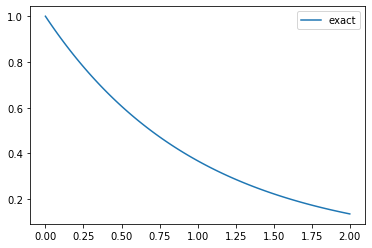

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
c = 1
init = 1
nt = 100

# 厳密解
t = np.linspace(0, 2, nt)
x_exact = init * np.exp(- c * t)
plt.plot(t, x_exact)

# 凡例
plt.legend(['exact'])
# 描画
plt.show()

## 近次解
今度は近次解を計算してグラフにしてみましょう。

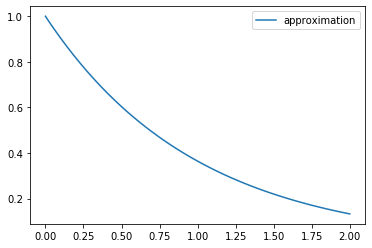

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def radioactive_euler(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    for i in range(1, nt):
        x[i] = x[i-1] - c * dt * x[i-1]

    return x

# パラメータ設定
c = 1
init = 1
nt = 101
# 近似解
x_approx = radioactive_euler(nt, init)
plt.plot(np.linspace(0, 2, nt), x_approx)

# 凡例
plt.legend(['approximation'])
# 描画
plt.show()

## 比較のために重ねる
これだけではよくわからないので重ねて描いてみます。

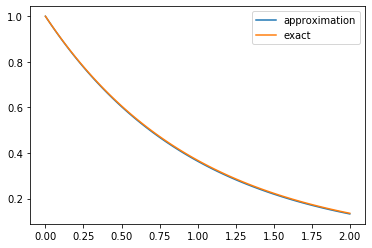

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def radioactive_euler(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    for i in range(1, nt):
        x[i] = x[i-1] - c * dt * x[i-1]

    return x

# パラメータ設定
c = 1
init = 1
nt = 100

# 近次解
x_approx = radioactive_euler(nt, init)
plt.plot(np.linspace(0, 2, nt), x_approx)

# 厳密解
t = np.linspace(0, 2, nt)
x_exact = init * np.exp(- c * t)
plt.plot(t, x_exact)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

## 比較結果の目視
ほぼピッタリ重なって見えます。
あくまで何となくではありますが、シミュレーションの精度はけっこう良さそうです。

もちろん細かいことを言えば誤差比較に関する議論がいろいろあります。
それはもっと進んだお話で、ここでは議論しきれません。
現代数学観光ツアーという別の無料講座で議論しているので、そちらも参考にしてください。

## 近似なんていい加減ことしたくない！
ここまで実際に微分方程式の厳密解と近似解を数値的に導き、比較してきました。
これで近似解を考えてみるのも面白いかもしれないと思った方もいるでしょう。
あなたもそうかもしれません。

しかし、もしかするとあなたは「近似なんて雑なことしていいの？」なんて思っているかもしれません。
「比較のために重ねる」節のグラフを見るとわかるように、
**厳密な解ともよく合っている**のでちゃんと使えば問題ありません。
「ちゃんと使う」の「ちゃんと」が難しいと言われればそれはもちろんそうです。

せっかくなので分割をどんどん大きくしていって**近似の精度が上がっていく様子**もグラフにしておきます。
こういう数値実験も簡単にできるので、ぜひ身につけてください。
プログラムが書けるとこういうのもささっとやれます。
こんなふうに遊べるのは本当にありがたいです。
中高生の頃にこれを知っていたら、
数学や物理だけではなくプログラミングにもはまっていたと思います。

やってみないとなかなかわからないと思いますが、
書いたプログラムで意図通りの結果が出るとけっこう**嬉しい**です。
パラメータをいじったり方程式を変えたり、
ちょろっといじって遊べる要素も増えて遊べる範囲が広がるのもいいですね。

## 細かく刻んだ方がいい近似になるはずだ
上のグラフは区間を 100 分割して計算しました。
`nt = 101` で分割を指定しています。
`101` は分点数の指定なので実際の分割としては 100 等分です。

ここで刻みが荒いといい近似にならないことを大雑把に調べておきます。
こういう具体的な検証はとても大事です。
少しコードをいじるだけで簡単に検証できるので、ぜひご自分でも実験してみてください。

同じようなコードを直接書いておくと変更点が見にくくわかりづらいので、
比較実験用のプログラムをまとめたセルを作り、
それを読み込む形にしました。
必ず**次のセルを実行してから**以下のセルを実行するようにしてください。

一通り実行してみたら、
今度は次のセルを読み、色々変えて数値実験してみてください。
手計算では処理しきれない領域で遊べるのが数学プログラミングの面白い所です。

### 次のセルが読み込むべきコードセル

In [ ]:
"""読み込むべきコードセル"""
import numpy as np
import matplotlib.pyplot as plt

def compare_radioactive(nt, init = 10):
    # 変数設定
    c = 1
    init = 1

    dt = 2 / (nt - 1)
    # 初期条件設定
    x_approx = np.zeros(nt)
    x_approx[0] = init

    # 近次解
    for i in range(1, nt):
        x_approx[i] = x_approx[i-1] - c * dt * x_approx[i-1]

    # 近似解の描画
    plt.plot(np.linspace(0, 2, nt), x_approx)

    # 厳密解
    ts = np.linspace(0, 2, 101)
    x_exact = init * np.exp(- c * ts)
    plt.plot(ts, x_exact)

    # 凡例
    plt.legend(['approximation', 'exact'])
    # 描画
    plt.show()

## 2 等分
もちろんろくな結果になりません。
厳密解はオレンジの線、近似解は青い線で描かれています。

### 注意
上で注意したように「次のセルが読み込むべきコードセル」のコードセルを読み込んでから次のセルを実行してください。

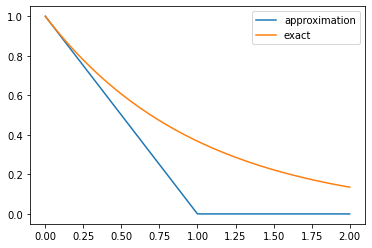

In [ ]:
compare_radioactive(3, 1)

## 4 等分
何となくそれっぽい形にはなってはいます。
もちろん精度は大したことなく、明らかな違いが簡単に見て取れます。

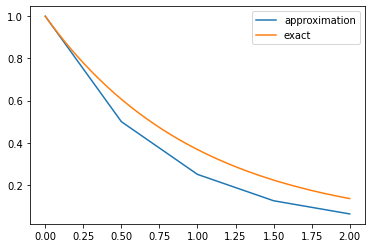

In [ ]:
compare_radioactive(5, 1)

## 10 等分
あまり適当なことを言うのも良くないのですが、この縮尺ではけっこう滑らかに見えてきました。
精度はまだまだです。

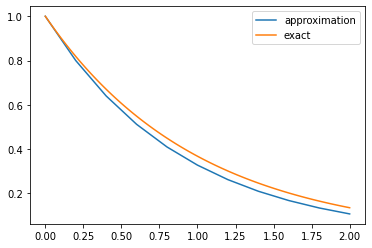

In [ ]:
compare_radioactive(11, 1)

## 30 等分
精度も良くなってきました。

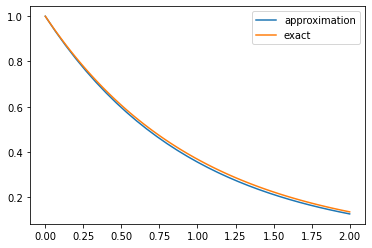

In [ ]:
compare_radioactive(31, 1)

## 50 等分
まだ差が目で見えます。

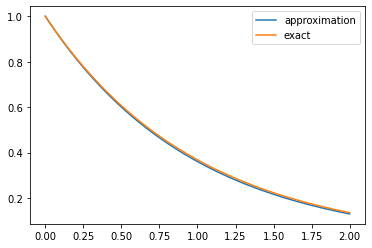

In [ ]:
compare_radioactive(51, 1)

## 75 等分
かなり良く一致してきました。

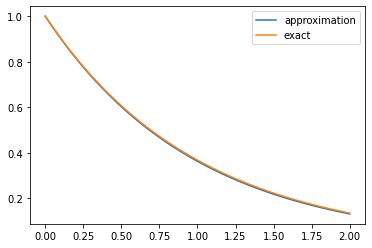

In [ ]:
compare_radioactive(76, 1)

## 1000 等分
100 は最初にやってあるので一気に大きくしてみましょう。

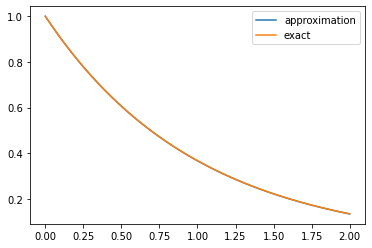

In [ ]:
compare_radioactive(1001, 1)

よく一致している様子が見て取れます。

## 参考
コンピュータで計算するときいろいろな都合があります。
実は分割数を多くすれば単純に精度が上がっていくと言うわけでありません。
具体的には桁落ちや丸め誤差のような問題があります。
それはそれで別途検討する必要があります。

## Python プログラミングに関する資料
数値計算・シミュレーションに関する資料は GitHub に上げてあります。
以下のリンク先で随時整理・追記しているので、ぜひあなたもこれで遊んでみてください。

- [GitHub 上のファイル集](https://github。com/phasetr/mathcodes)
- [nbviewr 上でのファイル集](https://nbviewer。jupyter。org/github/phasetr/mathcodes/tree/master/)

## 今回の数学的ポイント
**指数関数**や**自然対数の底**、はたまたその**導関数**が出てきました。
放射性物質の崩壊をちゃんと調べるにはこういう数学が必要なのです。

今回のメインパートはここまでです。

## 次回は経済や生物ネタです
次回はまた別の微分方程式を紹介します。
**経済学**や**生物学**で出てくる微分方程式です。
これが終わったらもう少し数学的にちゃんとした話をしましょう。
まずは微分方程式の射程距離の長さを知ってほしいからです。
もっとちゃんと数学の説明してほしいというあなた、
もうちょっと我慢してください。

# アンケート
毎回アンケートを取っています。
質問や要望がある場合もこちらにどうぞ。

- [アンケートへのリンク](https://goo.gl/forms/hn7bUP4sblqOkBcI3)

アンケートは匿名なので気楽にコメントしてください。
直接返事してほしいことがあれば、
メールなど適当な手段で連絡してください。